In [177]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
#export train and test data
#assign FIPS as an index
data = pd.read_csv('data_train.csv')
data.index=data.FIPS
data.drop('FIPS',axis=1,inplace=True)

data_test = pd.read_csv('data_test.csv')
data_test.index=data_test.FIPS
data_test.drop('FIPS',axis=1,inplace=True)

data.head()

,PCT_LACCESS_POP15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,PCH_LACCESS_HHNV_10_15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,...,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10,State_dup.2,County_dup.2,PCT_OBESE_ADULTS17
FIPS,,,,,,,,,,,,,,,,,,,,,
46093.0,33.937611,128.998025,4.055818,9.287743,25.217732,0.814751,1.020213,2.001203,2.420674,9.113768,...,55515.0,9.9,0.0,13.2,0.0,1.0,0.0,SD,Meade,31.9
13091.0,2.733921,28.407805,1.152705,1.480163,42.862673,4.141158,5.916170,0.835565,0.589355,0.744813,...,34611.0,24.8,0.0,38.1,0.0,0.0,0.0,GA,Dodge,31.6
55031.0,31.669447,32.030358,6.427066,8.485678,83.421093,1.197555,2.196569,3.455457,5.679658,7.045181,...,48715.0,14.8,0.0,20.1,0.0,1.0,0.0,WI,Douglas,32.0
34033.0,14.594507,24.843485,2.622724,3.274300,11.576592,2.262341,2.524243,1.464678,2.773516,3.169559,...,63988.0,11.9,0.0,18.5,0.0,1.0,0.0,NJ,Salem,27.3
48457.0,53.580620,-18.869495,23.242442,18.856711,-5.123586,4.323562,4.102041,7.939864,10.150880,10.127649,...,40820.0,19.9,0.0,25.1,0.0,0.0,0.0,TX,Tyler,33.0


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2358 entries, 46093.0 to 12007.0
Columns: 145 entries, PCT_LACCESS_POP15 to PCT_OBESE_ADULTS17
dtypes: float64(137), object(8)
memory usage: 2.6+ MB


In [180]:
# drop rows with NULLs
data.dropna(axis=0,inplace=True)

In [181]:
# convert columns with type 'object' info float and coers invalid values to NaN
data[['MEDHHINC15','POVRATE15','CHILDPOVRATE15',
      'POPLOSS10']]=data[['MEDHHINC15',
                          'POVRATE15','CHILDPOVRATE15','POPLOSS10']].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [182]:
data[['MEDHHINC15','POVRATE15','CHILDPOVRATE15','POPLOSS10']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1575 entries, 46093.0 to 12007.0
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MEDHHINC15      1575 non-null   float64
 1   POVRATE15       1575 non-null   float64
 2   CHILDPOVRATE15  1575 non-null   float64
 3   POPLOSS10       1575 non-null   float64
dtypes: float64(4)
memory usage: 61.5 KB


In [183]:
# Summary Table - transpose for ease of reading
summary_table = data.describe().transpose()
summary_table

,count,mean,std,min,25%,50%,75%,max
PCT_LACCESS_POP15,1575.0,19.971988,12.976661,0.000000,11.149964,18.261907,26.590413,1.000000e+02
PCH_LACCESS_LOWI_10_15,1575.0,14423.585321,563191.035732,-100.000000,-11.874546,2.957363,21.621527,2.234893e+07
PCT_LACCESS_LOWI10,1575.0,7.094219,5.762032,0.000000,3.462751,5.805564,9.126751,6.293529e+01
PCT_LACCESS_LOWI15,1575.0,7.266537,5.671136,0.000000,3.524287,6.059679,9.712448,5.764455e+01
PCH_LACCESS_HHNV_10_15,1575.0,11.672973,47.397863,-89.705548,-13.501885,4.476992,26.482200,6.280531e+02
...,...,...,...,...,...,...,...,...
CHILDPOVRATE15,1575.0,22.569968,9.035263,3.300000,15.900000,21.600000,28.000000,6.160000e+01
PERCHLDPOV10,1575.0,0.198095,0.398691,0.000000,0.000000,0.000000,0.000000,1.000000e+00
METRO13,1575.0,0.420952,0.493869,0.000000,0.000000,0.000000,1.000000,1.000000e+00
POPLOSS10,1575.0,0.140317,0.347426,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [184]:
# check the response variable distribution
data['PCT_OBESE_ADULTS17'].describe()

count    1575.000000
mean       31.763873
std         3.228173
min        22.600000
25%        30.100000
50%        32.300000
75%        33.800000
max        38.100000
Name: PCT_OBESE_ADULTS17, dtype: float64

Text(0.5, 1.0, 'Obesity Rates, %')

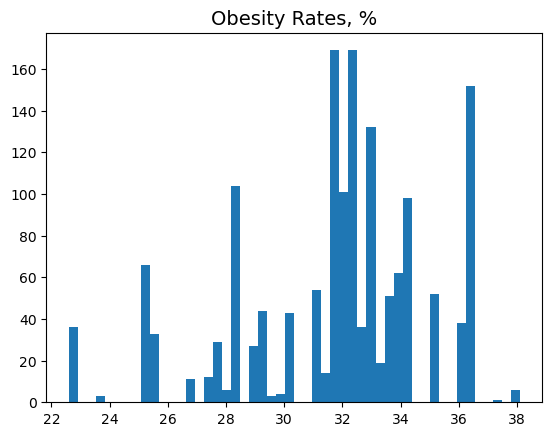

In [185]:
plt.hist(data['PCT_OBESE_ADULTS17'],bins=50)
plt.title('Obesity Rates, %', size = 14)

In [186]:
# calculate bottom and top values for 3 STD from the mean for the outcome variable
bottom_border=data['PCT_OBESE_ADULTS17'].mean()-3*data['PCT_OBESE_ADULTS17'].std()
top_border=data['PCT_OBESE_ADULTS17'].mean()+3*data['PCT_OBESE_ADULTS17'].std()
print(bottom_border)
print(top_border)

22.079353564267166
41.448392467478875


In [187]:
outliers = data[(data['PCT_OBESE_ADULTS17']<bottom_border) | (data['PCT_OBESE_ADULTS17']>top_border)]['PCT_OBESE_ADULTS17'].sort_values()
outliers

Series([], Name: PCT_OBESE_ADULTS17, dtype: float64)

In [188]:
# Access and Proximity to Grocery Store variable

In [189]:
data.iloc[:,:5].corr()

,PCT_LACCESS_POP15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,PCH_LACCESS_HHNV_10_15
PCT_LACCESS_POP15,1.000000,-0.018081,0.693662,0.877283,0.050968
PCH_LACCESS_LOWI_10_15,-0.018081,1.000000,-0.031546,-0.022950,-0.005237
PCT_LACCESS_LOWI10,0.693662,-0.031546,1.000000,0.795797,-0.128155
PCT_LACCESS_LOWI15,0.877283,-0.022950,0.795797,1.000000,0.059059
PCH_LACCESS_HHNV_10_15,0.050968,-0.005237,-0.128155,0.059059,1.000000


Text(0.5, 1.0, 'Access to Stores')

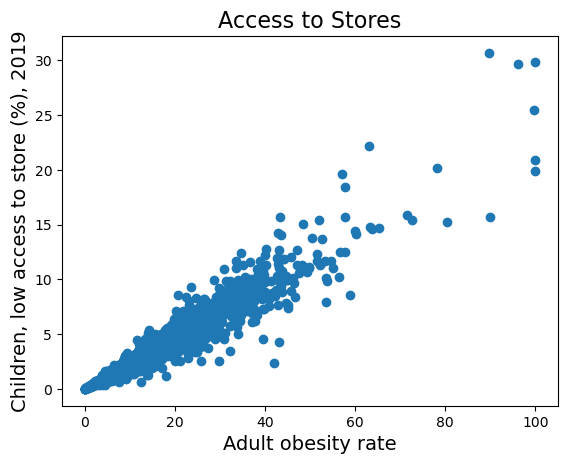

In [190]:
# create a scatter plot for two variables with high correlation
plt.scatter(data.PCT_LACCESS_POP15, data.PCT_LACCESS_CHILD15)
plt.xlabel('Adult obesity rate',size = 14)
plt.ylabel('Children, low access to store (%), 2019',size = 14)
plt.title('Access to Stores', size=16)

Text(0, 0.5, 'Adult obesity rate (%)')

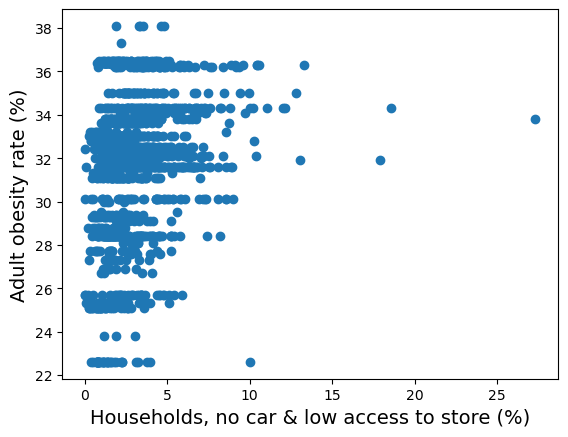

In [191]:
plt.scatter(data.PCT_LACCESS_HHNV15, data.PCT_OBESE_ADULTS17)
plt.xlabel('Households, no car & low access to store (%)', size = 14)
plt.ylabel('Adult obesity rate (%)', size = 14)

In [192]:
# Run correlations with all variables
# see the top 10 predicotrs (i.e. highest correlation with the outcome variable)
data.drop(['State_dup.2','County_dup.2'],axis=1,inplace=True)


In [193]:
data

,PCT_LACCESS_POP15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,PCH_LACCESS_HHNV_10_15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10,PCT_OBESE_ADULTS17
FIPS,,,,,,,,,,,,,,,,,,,,,
46093.0,33.937611,128.998025,4.055818,9.287743,25.217732,0.814751,1.020213,2.001203,2.420674,9.113768,...,11.944641,25.222144,55515.0,9.9,0.0,13.2,0.0,1.0,0.0,31.9
55031.0,31.669447,32.030358,6.427066,8.485678,83.421093,1.197555,2.196569,3.455457,5.679658,7.045181,...,14.404765,21.433909,48715.0,14.8,0.0,20.1,0.0,1.0,0.0,32.0
34033.0,14.594507,24.843485,2.622724,3.274300,11.576592,2.262341,2.524243,1.464678,2.773516,3.169559,...,15.006885,23.470484,63988.0,11.9,0.0,18.5,0.0,1.0,0.0,27.3
48457.0,53.580620,-18.869495,23.242442,18.856711,-5.123586,4.323562,4.102041,7.939864,10.150880,10.127649,...,18.969953,19.994487,40820.0,19.9,0.0,25.1,0.0,0.0,0.0,33.0
36011.0,6.599715,-5.106736,1.776918,1.686175,-19.887516,2.500140,2.002924,0.762321,1.602592,1.391616,...,15.288781,21.615475,51925.0,12.7,0.0,20.3,0.0,0.0,1.0,25.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55103.0,20.406371,0.827550,7.650663,7.713976,-11.083760,3.190892,2.837221,2.344750,5.108453,5.067764,...,18.006770,23.306143,46998.0,14.2,0.0,21.8,0.0,0.0,0.0,32.0
12103.0,14.322892,-20.574673,4.956314,3.936569,-4.893198,0.937164,0.891306,1.297755,3.151643,2.575508,...,21.177316,17.772017,47591.0,13.6,0.0,20.6,0.0,1.0,0.0,28.4
53017.0,42.620488,15.141397,14.769403,17.005697,38.930807,1.181265,1.641141,5.406409,12.264866,11.928728,...,14.163045,27.246234,51400.0,13.5,0.0,21.0,0.0,1.0,0.0,27.7


In [194]:
print(data.dtypes)


PCT_LACCESS_POP15         float64
PCH_LACCESS_LOWI_10_15    float64
PCT_LACCESS_LOWI10        float64
PCT_LACCESS_LOWI15        float64
PCH_LACCESS_HHNV_10_15    float64
                           ...   
CHILDPOVRATE15            float64
PERCHLDPOV10              float64
METRO13                   float64
POPLOSS10                 float64
PCT_OBESE_ADULTS17        float64
Length: 143, dtype: object


In [195]:
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except ValueError:
        continue  # This will skip columns that cannot be coerced to numeric


In [196]:
corr = data.corr()
top_predictors = corr['PCT_OBESE_ADULTS17'].sort_values(ascending=False).head(6)
print(top_predictors)


PCT_OBESE_ADULTS17    1.000000
PCT_NSLP17            0.625975
VLFOODSEC_15_17       0.592439
FOODINSEC_15_17       0.508099
PCT_SBP17             0.420944
PCT_WIC17             0.375258
Name: PCT_OBESE_ADULTS17, dtype: float64


Text(0, 0.5, 'Adult obesity rate (%)')

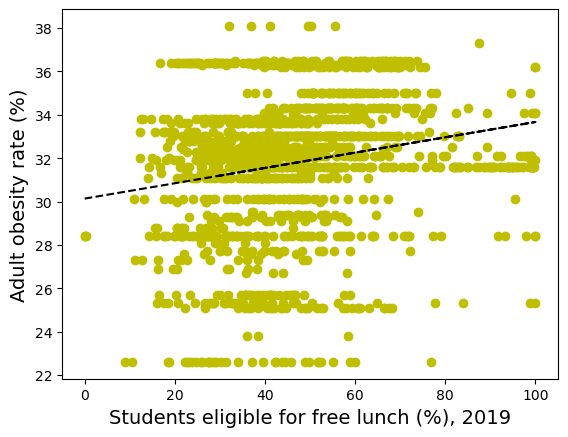

In [197]:
# create scatterplot of the most correlated variable
fit = np.polyfit(data.PCT_FREE_LUNCH15,data.PCT_OBESE_ADULTS17,1)
fit_fn = np.poly1d(fit) 

plt.plot(data.PCT_FREE_LUNCH15,data.PCT_OBESE_ADULTS17, 'yo', data.PCT_FREE_LUNCH15, fit_fn(data.PCT_FREE_LUNCH15), '--k')
plt.xlabel('Students eligible for free lunch (%), 2019', size=14)
plt.ylabel('Adult obesity rate (%)', size=14)

In [198]:
# compute the average of obesity rate for Persistent-poverty counties predictor
data.groupby(['PERPOV10'])[['PCT_OBESE_ADULTS17']].mean()

,PCT_OBESE_ADULTS17
PERPOV10,
0.0,31.609727
1.0,33.272603


In [199]:
# compute the average of obesity rate for Persistent-child-poverty counties counties
data.groupby(['PERCHLDPOV10'])[['PCT_OBESE_ADULTS17']].mean()

,PCT_OBESE_ADULTS17
PERCHLDPOV10,
0.0,31.489311
1.0,32.875321


In [200]:
data.head()

,PCT_LACCESS_POP15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,PCH_LACCESS_HHNV_10_15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10,PCT_OBESE_ADULTS17
FIPS,,,,,,,,,,,,,,,,,,,,,
46093.0,33.937611,128.998025,4.055818,9.287743,25.217732,0.814751,1.020213,2.001203,2.420674,9.113768,...,11.944641,25.222144,55515.0,9.9,0.0,13.2,0.0,1.0,0.0,31.9
55031.0,31.669447,32.030358,6.427066,8.485678,83.421093,1.197555,2.196569,3.455457,5.679658,7.045181,...,14.404765,21.433909,48715.0,14.8,0.0,20.1,0.0,1.0,0.0,32.0
34033.0,14.594507,24.843485,2.622724,3.274300,11.576592,2.262341,2.524243,1.464678,2.773516,3.169559,...,15.006885,23.470484,63988.0,11.9,0.0,18.5,0.0,1.0,0.0,27.3
48457.0,53.580620,-18.869495,23.242442,18.856711,-5.123586,4.323562,4.102041,7.939864,10.150880,10.127649,...,18.969953,19.994487,40820.0,19.9,0.0,25.1,0.0,0.0,0.0,33.0
36011.0,6.599715,-5.106736,1.776918,1.686175,-19.887516,2.500140,2.002924,0.762321,1.602592,1.391616,...,15.288781,21.615475,51925.0,12.7,0.0,20.3,0.0,0.0,1.0,25.7


In [201]:
corr=data.iloc[:,:-1].corr()

In [202]:
# Make sure the correlation matrix doesn't have NaN or infinite values
corr_clean = corr.replace([np.inf, -np.inf], np.nan).dropna(how="all", axis=0).dropna(how="all", axis=1)

In [203]:
# get eigen values for predictor variables
w, v = np.linalg.eig(corr_clean)
# eigen_val=pd.DataFrame({'feature':corr.columns,'epigen_value':w})
eigen_val = pd.DataFrame({'feature': corr_clean.columns, 'epigen_value': w})

eigen_val

,feature,epigen_value
0,PCT_LACCESS_POP15,19.768874
1,PCH_LACCESS_LOWI_10_15,10.558466
2,PCT_LACCESS_LOWI10,8.161603
3,PCT_LACCESS_LOWI15,6.419761
4,PCH_LACCESS_HHNV_10_15,5.963563
...,...,...
131,PERPOV10,0.001310
132,CHILDPOVRATE15,0.001224
133,PERCHLDPOV10,0.000470
134,METRO13,0.000536


In [204]:
# get predictors with eigen values close to zero
low_eigen = eigen_val[eigen_val.epigen_value < 0.01]

In [205]:
low_eigen

,feature,epigen_value
117,AGRITRSM_OPS07,9.701033e-03
118,AGRITRSM_OPS12,9.392719e-03
120,NATAMEN,7.783854e-03
121,PCT_NHWHITE10,6.152078e-03
122,PCT_NHBLACK10,4.565973e-03
123,PCT_HISP10,3.568484e-03
124,PCT_NHASIAN10,3.193565e-03
125,PCT_NHNA10,2.265754e-03
126,PCT_NHPI10,1.514951e-03
127,PCT_65OLDER10,8.165626e-04


In [206]:
# Get vecors for features with eigen values close to zero
columns=data.columns.values[:-1]

# Create a new DataFrame for the eigenvectors
vectors = pd.DataFrame(index=data.index)

# Create a new DataFrame for the eigenvectors
vectors = pd.DataFrame(v.T, columns=corr_clean.columns)

# Filter the vectors DataFrame to only include those features with low eigenvalues
low_vectors = vectors[low_eigen['feature'].values]

# Add eigenvectors to the vectors DataFrame for low eigenvalue features
for feature in low_eigen.feature.values:
    index = low_eigen[low_eigen.feature == feature].index.item()  # Get the integer index
    vectors[feature] = v[:, index]  # Assign the eigenvector to the corresponding feature column


In [207]:
vectors.head()

,PCT_LACCESS_POP15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,PCH_LACCESS_HHNV_10_15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,...,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,-0.025591,-0.002287,-0.071750,-0.069464,-0.019024,-0.092654,-0.094231,-0.062939,-0.017832,-0.020653,...,0.002187,-0.003745,0.000294,7.289596e-01,-4.407389e-05,-0.002956,-0.000705,-0.002225,0.008331,0.000246
1,-0.057057,0.014693,-0.108493,-0.126631,0.012420,-0.134792,-0.139375,-0.169534,-0.047064,-0.063635,...,0.000665,-0.001919,0.706821,-7.175072e-10,1.238052e-13,0.000678,0.000143,0.014169,0.004646,0.010486
2,0.299551,-0.004252,0.238847,0.249882,0.002276,-0.077918,-0.090858,0.179481,0.279047,0.294955,...,-0.001557,0.000321,-0.000689,4.297429e-10,-2.618822e-14,0.001401,0.002282,0.001492,-0.003653,-0.000986
3,-0.036637,0.002262,-0.065003,-0.043492,0.015762,-0.053167,-0.050914,-0.029717,-0.017232,-0.003677,...,-0.001490,0.000542,-0.001577,-8.402452e-10,5.058631e-14,-0.001779,-0.001751,-0.000135,-0.000974,-0.003644
4,0.060486,-0.009290,0.028035,0.042348,-0.019464,-0.072410,-0.081412,0.036106,0.068505,0.073251,...,-0.001939,-0.002702,0.000141,-1.071245e-10,6.328905e-15,-0.000870,0.000663,-0.000451,0.002184,0.000934


In [208]:
# get features with eigen vectors that are NOT close to zero (i.e. strongly correlated with each other)
vectors.iloc[:,1:]=vectors.iloc[:,1:].abs()

In [209]:
# For each vector print features that have high collinearity
d={}
for i in range(1,len(vectors.columns)):
    d['collinear{0}'.format(i)] = vectors[vectors.iloc[:,i]>0.01].iloc[:,[0,i]]
    print( vectors[vectors.iloc[:,i]>0.01].iloc[:,[0,i]])
    print ("XXX")

     PCT_LACCESS_POP15  PCH_LACCESS_LOWI_10_15
1            -0.057057                0.014693
5             0.109180                0.024794
6             0.024393                0.038502
8             0.022841                0.017396
9            -0.004865                0.013279
10            0.045783                0.016822
11           -0.008457                0.033873
12           -0.022417                0.062922
13           -0.033784                0.085225
15            0.010538                0.074914
16           -0.019781                0.466775
17            0.025805                0.347924
18           -0.011511                0.067454
19            0.018463                0.288939
21            0.036428                0.057314
22           -0.002843                0.106144
23            0.063198                0.080302
24            0.023058                0.026949
25            0.005105                0.042913
26           -0.049670                0.053143
27           

In [210]:
# Collinear variables can be tested to identify the best predictor and drop the rest of them
d['collinear1'].head()

,PCT_LACCESS_POP15,PCH_LACCESS_LOWI_10_15
1,-0.057057,0.014693
5,0.109180,0.024794
6,0.024393,0.038502
8,0.022841,0.017396
9,-0.004865,0.013279


MODELLING

In [211]:
# Set a benchmark for linear regression model - MSE
y_mean = data['PCT_OBESE_ADULTS17'].mean()
MSE_benchmark = ((data['PCT_OBESE_ADULTS17'] - y_mean) ** 2).mean()
print(f"Performance benchmark MSE = {MSE_benchmark}")


Performance benchmark MSE = 10.414485317208362


In [212]:
# convert columns with type 'object' info float and coers invalid values to NaN
data_test[['MEDHHINC15','POVRATE15','CHILDPOVRATE15',
      'POPLOSS10']]=data_test[['MEDHHINC15',
                          'POVRATE15','CHILDPOVRATE15','POPLOSS10']].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [213]:
#drop rows with NULL values in predictor variable
data_test.dropna(subset=['PCT_OBESE_ADULTS17'],inplace=True) 

In [214]:
# Fill zero instead of NULL values 
data_test.fillna(value=0,inplace=True)


In [215]:
# set a list of features for the model 
feature_cols = list(data.columns.values)[:-1]
X_train = data[feature_cols]
y_train = data['PCT_OBESE_ADULTS17']

X_test = data_test[feature_cols]
y_test = data_test['PCT_OBESE_ADULTS17']

In [216]:
print( len(X_train))
print( len(X_test))

1575
786


RANDOM FOREST

In [217]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Instantiate the model
model = RandomForestRegressor(n_estimators=100)

# Check for columns that are completely NaN which might be dropped during imputation
nan_cols = [col for col in X_train.columns if X_train[col].isna().all()]

# Impute the missing values in X_train
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train.drop(columns=nan_cols))

# Reconstruct X_train with imputed values and original column names minus fully NaN columns
original_column_names=X_train.columns.tolist()
X_train = pd.DataFrame(X_train_imputed, columns=[col for col in original_column_names if col not in nan_cols])

# Fit the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [218]:
features = X_train.columns

features_df = pd.DataFrame({'Features': features, 'Importance Score': model.feature_importances_.round(4)})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

# crete a table with top 20 featueres
top_20_rf = features_df['Features'].head(20)

print("Features sorted by their Importance score:")
features_df.head(10)

Features sorted by their Importance score:


,Features,Importance Score
59,PCT_NSLP17,0.3123
65,PCT_SFSP17,0.2302
72,VLFOODSEC_15_17,0.1495
70,FOODINSEC_15_17,0.0632
67,PCT_CACFP17,0.0596
71,CH_FOODINSEC_14_17,0.0551
53,PCT_SNAP17,0.0480
64,PCT_SBP17,0.0289
77,CHIPSTAX_VENDM14,0.0127
66,PCT_WIC17,0.0105


In [219]:
# 5 cross validation iterationsfrom sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Assuming you have your X_train and y_train ready
model = RandomForestRegressor(n_estimators=100)

# Setup for 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Add a random state for reproducibility

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')

# You might want to use the mean squared error directly (without the negative sign)
mse_scores = -cv_scores  # Negate the values to get positive MSE scores

# Print the MSE scores from each fold
print("MSE scores from each fold: ", mse_scores)

# Calculate the average MSE across all folds
average_mse = mse_scores.mean()
print("Average MSE: ", average_mse)
10

MSE scores from each fold:  [0.00344461 0.07767593 0.00265959 0.00467411 0.00467197]
Average MSE:  0.01862524317460332


10

In [220]:
score = -np.mean(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv))
print("Random Forest MSE on the train set: %f" %(score))

Random Forest MSE on the train set: 0.021201


In [221]:
# Align X_test columns to match X_train
X_test = X_test[X_train.columns]


In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Instantiate the model
model = RandomForestRegressor(n_estimators=100)

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate the R-squared value to see how well the regression model fits the data
r2 = r2_score(y_test, y_pred)
print("R-squared =", r2)


R-squared = 0.9148711951183521


Text(0.5, 1.0, 'Obesity Rates, %')

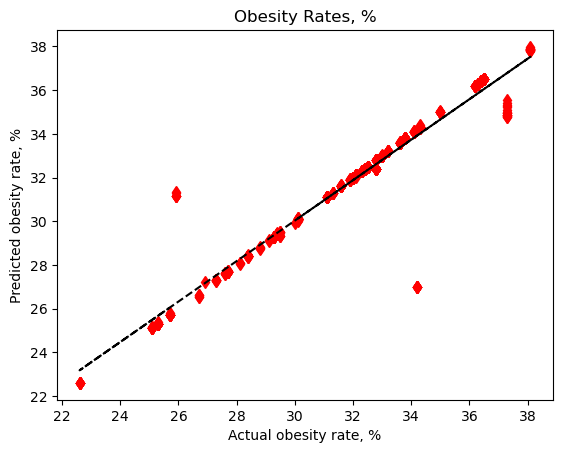

In [223]:
fit = np.polyfit(y_test,model.predict(X_test),1)
fit_fn = np.poly1d(fit) 

# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_test,model.predict(X_test), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

In [224]:
from sklearn.metrics import mean_squared_error

In [225]:
# get MSE for test data set
MSE_rf = mean_squared_error(y_test, model.predict(X_test))
MSE_rf

0.9082234936386768

In [226]:
# Create performance score table to collect MSE resulrs for all tested models
Performance = pd.DataFrame({'Model': 'Random Forest', 'n_features': len(X_test.columns),'MSE':MSE_rf},index=[1])
Performance = Performance[['Model','n_features','MSE']]

Linear Regression Model
FOR LOOP for Linear Regression - feature testing

In [227]:
from sklearn.linear_model import LinearRegression

In [228]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [229]:
# loop through the features by adding one feature each step starting with feature with the highest importance score (RF)

features = features_df.Features.values

feature_cols=[]
scores = []

y_train = data['PCT_OBESE_ADULTS17']
y_test = data_test['PCT_OBESE_ADULTS17']

for i in features:
    feature_cols.append(i)
    
    X_train=data[feature_cols]
    X_test=data_test[feature_cols]

    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train_std, y_train)
    
    score = -np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
    scores.append(score)

In [230]:
scores = pd.DataFrame(scores, index=range(1,len(features)+1),columns=["MSE"])
scores.index.name = 'N of Features'

Text(0, 0.5, 'MSE')

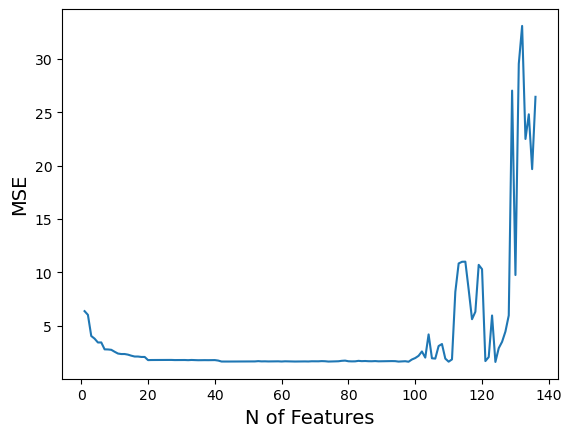

In [231]:
plt.plot(scores.index, scores.MSE)
plt.xlabel('N of Features', size = 14)
plt.ylabel('MSE', size = 14)

In [232]:
MSE_lr_all = mean_squared_error(y_test, lr.predict(X_test_std))
MSE_lr_all

3.0235900109398215

In [233]:
Performance.loc[-1] = ['Linear Regression _all_features', len(X_test.columns), MSE_lr_all]
Performance.index = Performance.index + 1 

In [234]:
Performance

,Model,n_features,MSE
2,Random Forest,136,0.908223
0,Linear Regression _all_features,136,3.023590


Text(0.5, 1.0, 'Obesity Rates, %')

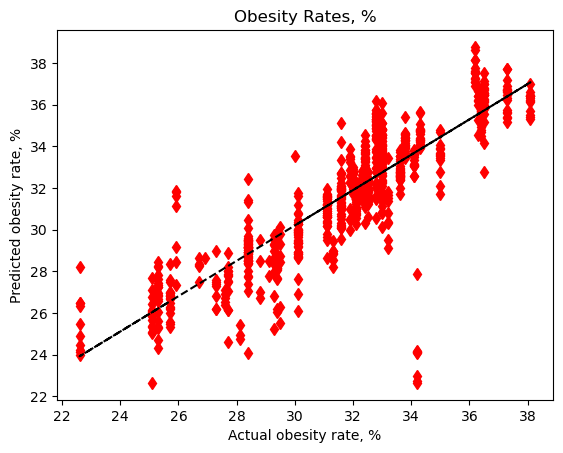

In [235]:
fit = np.polyfit(y_test,lr.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,lr.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

In [236]:
# Take top 80% of features from Random Forest model by Importance Score

features_df['Running Sum']= features_df['Importance Score'].cumsum()

top_80pct_rf = features_df[features_df['Running Sum']<=0.8]
top_80pct_rf

,Features,Importance Score,Running Sum
59,PCT_NSLP17,0.3123,0.3123
65,PCT_SFSP17,0.2302,0.5425
72,VLFOODSEC_15_17,0.1495,0.6920
70,FOODINSEC_15_17,0.0632,0.7552


In [237]:
print( "Top 80 percent of features represent %d features" %(len(top_80pct_rf)))

Top 80 percent of features represent 4 features


In [238]:
feature_cols = top_80pct_rf.Features.values
feature_cols

array(['PCT_NSLP17', 'PCT_SFSP17', 'VLFOODSEC_15_17', 'FOODINSEC_15_17'],
      dtype=object)

In [239]:
# set a list of features for top 80% of features for Linear Regression model 
feature_cols = top_80pct_rf.Features.values

X_train = data[feature_cols]
X_test = data_test[feature_cols]

In [240]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

# transform training and test features
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [241]:
lr = LinearRegression()

In [242]:
lr.fit(X_train_std, y_train)

LinearRegression()

In [243]:
pd.DataFrame(zip(X_train.columns, lr.coef_), columns=['features', 'coefs']).sort_values('coefs')

,features,coefs
3,FOODINSEC_15_17,-1.399145
1,PCT_SFSP17,-0.606793
0,PCT_NSLP17,1.652080
2,VLFOODSEC_15_17,2.741268


In [244]:
MSE_lr = -np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
print( "Linear Regression MSE score on a train set: %f" %(MSE_lr))

Linear Regression MSE score on a train set: 3.776359


In [245]:
r2 = lr.score(X_test_std,y_test)
print("R squared = %f" %(r2))

R squared = 0.461136


In [246]:
MSE_lr = -np.mean(cross_val_score(lr, X_test_std, y_test, scoring='neg_mean_squared_error', cv=cv))
print( "Linear Regression MSE score on a test set: %f" %(MSE_lr))

Linear Regression MSE score on a test set: 5.494760


In [247]:
Performance.loc[-1] = ['Linear Regression', len(X_test.columns), MSE_lr]
Performance.index = Performance.index + 1 

Text(0.5, 1.0, 'Obesity Rates, %')

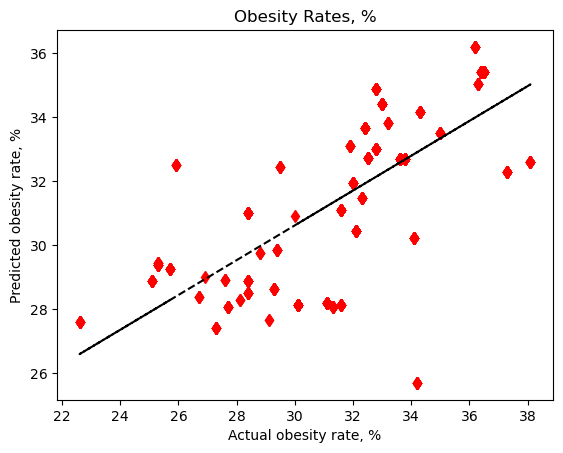

In [248]:
fit = np.polyfit(y_test,lr.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_test,lr.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

Linear Regression with Outliers Removed

In [249]:
residuals = pd.DataFrame(X_train)
residuals['Predicted Response'] = lr.predict(X_train_std)
residuals['Actual Response'] = y_train
residuals['Residual'] = lr.predict(X_train_std) - y_train

In [250]:
residuals[(residuals['Residual']>7.5) | (residuals['Residual']<-8)].sort_values('Residual')

,PCT_NSLP17,PCT_SFSP17,VLFOODSEC_15_17,FOODINSEC_15_17,Predicted Response,Actual Response,Residual
FIPS,,,,,,,


(-15.0, 15.0)

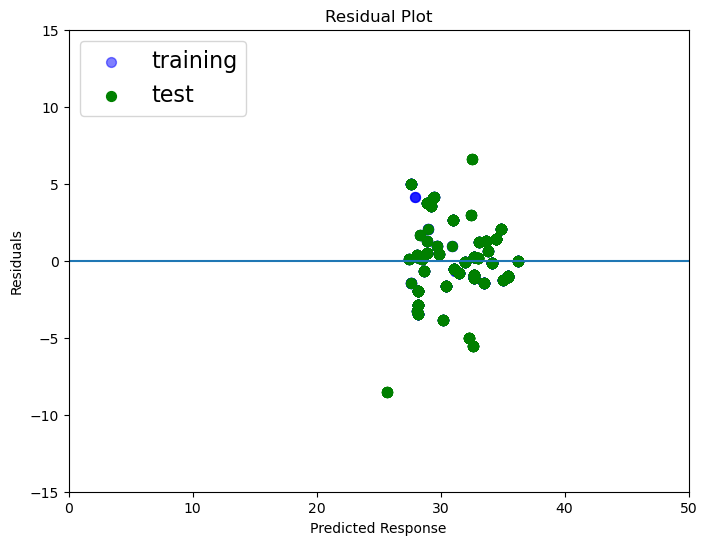

In [251]:
# create a resdidual plot to check for errors in the data
plt.figure(figsize=(8,6))
plt.scatter(lr.predict(X_train_std), lr.predict(X_train_std)-y_train, c='b', s=50, alpha=0.5, label='training')
plt.scatter(lr.predict(X_test_std), lr.predict(X_test_std)-y_test, c='g',s=50, label='test')
plt.legend(loc='upper left',prop={'size':16})
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.xlim(0,50)
plt.ylim(-15,15)

In [252]:
# Remove Response value outliers outside of the three STDs from the mean

feature_cols = top_80pct_rf.Features.values
X = data
X_test = data_test[feature_cols]


response_mean = y_train.mean()
response_std = y_train.std()

X = X[(X.PCT_OBESE_ADULTS17 >  (response_mean-3*response_std)) &
      (X.PCT_OBESE_ADULTS17 <  (response_mean+3*response_std))]

y_train = X['PCT_OBESE_ADULTS17']
X_train = X[feature_cols]

In [253]:
len(X_train)

1575

In [254]:
# transform training and test features

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [255]:
lr = LinearRegression()

In [256]:
lr.fit(X_train_std, y_train)

LinearRegression()

In [257]:
lr.coef_

array([ 1.65207962, -0.60679288,  2.74126823, -1.39914504])

In [258]:
MSE_lr = -np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
print("Linear Regression MSE score on a train set: %f" %(MSE_lr))

Linear Regression MSE score on a train set: 3.776359


In [259]:
Performance.loc[-1] = ['Linear Regression_no outliers', len(X_test.columns), MSE_lr]
Performance.index = Performance.index + 1 

Text(0.5, 1.0, 'Obesity Rates, %')

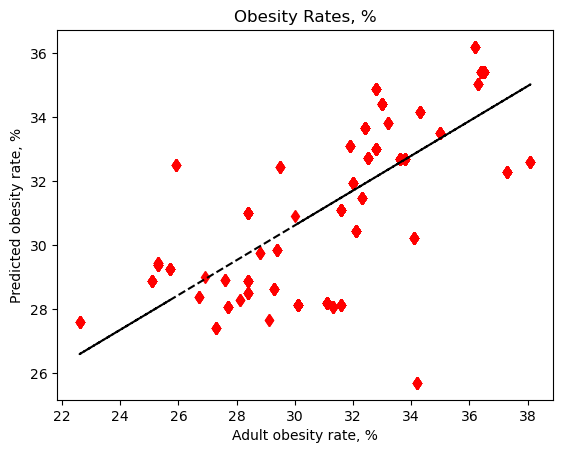

In [260]:
fit = np.polyfit(y_test,lr.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_test,lr.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Adult obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

MSE with outliers removed produced the best result

In [261]:
# rmove reponse variables outliers from data
response_mean = data['PCT_OBESE_ADULTS17'].mean()
response_std = data['PCT_OBESE_ADULTS17'].std()
print( response_mean)
print (response_std)

31.76387301587302
3.2281731505352846


In [262]:
# rmove reponse variables outliers from data
data = data[(data.PCT_OBESE_ADULTS17 >  (response_mean-3*response_std)) &
      (data.PCT_OBESE_ADULTS17 <  (response_mean+3*response_std))]

In [263]:
# check correlation between the best features out of collinear feature sets:
best_of_col = data[['CHILDPOVRATE15','PCT_FREE_LUNCH15']]
best_of_col.corr()

,CHILDPOVRATE15,PCT_FREE_LUNCH15
CHILDPOVRATE15,1.00000,0.84655
PCT_FREE_LUNCH15,0.84655,1.00000


Lasso and Ridge
Lasso with Gridsearch

In [264]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV


In [265]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming 'data' and 'data_test' are your DataFrames
feature_cols = list(data.columns.values)[:-1]
X_train = data[feature_cols]
y_train = data[data.columns.values[-1]]
X_test = data_test[feature_cols]
y_test = data_test[data_test.columns.values[-1]]

# One-hot encode using pd.get_dummies to handle categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Check for NaN values and impute if necessary
imputer = SimpleImputer(strategy='mean')
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)

# Scale the data
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train_encoded)
X_test_std = stdsc.transform(X_test_encoded)


In [266]:
parameters = {'alpha' : np.linspace(0.0001,100,1000)}
lasso = Lasso()
clf = GridSearchCV(lasso, parameters, cv=cv)
clf.fit(X_train_std,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.493e+02, tolerance: 1.314e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.798e+02, tolerance: 1.315e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.419e+02, tolerance: 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000e-04, 1.00200e-01, 2.00300e-01, 3.00400e-01, 4.00500e-01,
       5.00600e-01, 6.00700e-01, 7.00800e-01, 8.00900e-01, 9.01000e-01,
       1.00110e+00, 1.10120e+00, 1.20130e+00, 1.30140e+00, 1.40150e+00,
       1.50160e+00, 1.60170e+00, 1.70180e+00, 1.80190e+00, 1.90200e+00,
       2....
       9.70971e+01, 9.71972e+01, 9.72973e+01, 9.73974e+01, 9.74975e+01,
       9.75976e+01, 9.76977e+01, 9.77978e+01, 9.78979e+01, 9.79980e+01,
       9.80981e+01, 9.81982e+01, 9.82983e+01, 9.83984e+01, 9.84985e+01,
       9.85986e+01, 9.86987e+01, 9.87988e+01, 9.88989e+01, 9.89990e+01,
       9.90991e+01, 9.91992e+01, 9.92993e+01, 9.93994e+01, 9.94995e+01,
       9.95996e+01, 9.96997e+01, 9.97998e+01, 9.98999e+01, 1.00000e+02])})

In [ ]:
# get the best performing combo
clf.best_params_

Lasso with best alpha parameter

In [ ]:
lasso = Lasso(alpha=0.0001)

In [ ]:
lasso.fit(X_train_std, y_train)

In [ ]:
MSE_las = -np.mean(cross_val_score(lasso, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_las

In [ ]:
Performance.loc[-1] = ['Lasso (alpha=0.0001)', len(X_test.columns), MSE_las]
Performance.index = Performance.index + 1 

In [ ]:
# Check the length of features and coefficients
print("Number of features in X_train:", len(X_train.columns))
print("Number of coefficients in lasso model:", len(lasso.coef_))

In [ ]:
# create lists with variable names for each category
access = list(data.columns.values)[0:5]
store_avail = list(data.columns.values)[5:11]
restaurant_avail = list(data.columns.values)[11:15]
food_assist = list(data.columns.values)[15:29]
food_insecureity = list(data.columns.values)[29:32]
food_price_tax = list(data.columns.values)[32:35]
local_foods = list(data.columns.values)[35:46]
health_physical = list(data.columns.values)[46:48]
socioec = list(data.columns.values)[48:63]

categories = [access,store_avail,restaurant_avail,food_assist,food_insecureity,
              food_price_tax,local_foods,health_physical,socioec]


lasso = Lasso(alpha=0.0001)
feature_cols = []
MSE_scores=[]

for i in categories:
    feature_cols = i
    
    X_train = data[feature_cols]
    X_test = data_test[feature_cols]

    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    
    lasso.fit(X_train_std, y_train)
    
    score = -np.mean(cross_val_score(lasso, X_test_std, y_test, scoring='neg_mean_squared_error', cv=cv))
    MSE_scores.append(score)

In [ ]:
categories = ['access','store_avail','restaurant_avail','food_assist','food_insecureity',
             'food_price_tax','local_foods','health_physical','socioec']
MSE_by_categoty = pd.DataFrame({'category':categories,'MSE':MSE_scores})
MSE_by_categoty.sort_values('MSE',ascending = True,inplace = True)
MSE_by_categoty

In [ ]:
categories = MSE_by_categoty['category'].values

In [ ]:
categories

In [ ]:
plt.figure(figsize = (8,6))

plt.barh(np.arange(len(MSE_by_categoty['category'])), MSE_by_categoty['MSE'], color='orange')
plt.xlabel('MSE',size=14)
plt.yticks(np.arange(len(categories)),categories,size=14)
plt.title('Variables Within Each Category',size=20)
;

PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [ ]:
X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

In [ ]:
pca = PCA()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Assuming X_train is already defined

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can change strategy to 'median' if more appropriate
X_train_imputed = imputer.fit_transform(X_train)

# Step 2: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Step 3: Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Optional: Check the explained variance to see how many components might be necessary
print("Explained variance ratio:", pca.explained_variance_ratio_)


In [ ]:
print ("Explained Variance: (% cumulative)")
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [ ]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio with the correct number of principal components
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Number of principal components')
plt.ylabel('Variance explained')
plt.title('Explained Variance Ratio by PCA Components', size=16)
plt.vlines(x=10, ymin=0, ymax=max(pca.explained_variance_ratio_), colors='yellow', label='Component 10')
plt.legend()
plt.show()



In [ ]:

# Print unique values of object-type columns to see what's being missed
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Unique values in {col}:", X_train[col].unique())
